<a href="https://colab.research.google.com/github/dayeon24/24-1_ML-HW/blob/main/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# import missingno as msno

# Kaggle에서 제공하는 당뇨병예측 데이터셋 로드
url = "https://raw.githubusercontent.com/dayeon24/24-1_ML-HW/main/diabetes_prediction_dataset.csv"
df = pd.read_csv(url, sep=',')

# 데이터 확인
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [ ]:
cat_cols = [x for x in df.dtypes.index if df.dtypes[x] == 'object']
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


gender:
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

smoking_history:
smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64


In [ ]:
pd.crosstab(df.gender, df.hypertension, margins = True)

hypertension,0,1,All
gender,,,
Female,51982,4179,56161
Male,36685,3282,39967
Other,18,0,18
All,88685,7461,96146


In [ ]:
pd.crosstab(df.smoking_history, df.diabetes, margins = True)

diabetes,0,1,All
smoking_history,,,
No Info,31442,1445,32887
current,8249,948,9197
ever,3526,472,3998
former,7709,1590,9299
never,31061,3337,34398
not current,5677,690,6367
All,87664,8482,96146


# 데이터 확인

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(2, 5*2))
for i, column in enumerate(["age","bmi","HbA1c_level","blood_glucose_level"]):
    row = i // 2
    col = i % 2
    sns.boxplot(y=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {column}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel(column)

plt.tight_layout()
plt.show()

데이터 분할

In [ ]:
embedding_df = pd.get_dummies(df, columns=['gender','smoking_history'], drop_first=True)

X = embedding_df.drop('diabetes', axis=1)
y = embedding_df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

데이터 정규화

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape, X_test_scaled.shape

((76916, 13), (19230, 13))

EDA

In [ ]:
train_data = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train_data['target'] = y_train

# train_data['target'] = y_train.reset_index(drop=True)
# sns.pairplot(train_data, hue='target')
# plt.show()

# correlation_matrix = train_data.corr()
# sns.heatmap(correlation_matrix, annot=True)
# plt.show()

train_data.hist(bins=10, figsize=(10,8))
plt.show()

# reference

#기본적인 신경망 학습

In [ ]:
# 신경망 모델 정의
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Loss 변화 그래프 작성
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32)


Epoch 1/50
1923/1923 [==============================] - 13s 6ms/step - loss: 0.1276 - accuracy: 0.9557 - val_loss: 0.1190 - val_accuracy: 0.9570
Epoch 2/50
1923/1923 [==============================] - 9s 5ms/step - loss: 0.1109 - accuracy: 0.9615 - val_loss: 0.1109 - val_accuracy: 0.9596
Epoch 3/50
1923/1923 [==============================] - 5s 3ms/step - loss: 0.1014 - accuracy: 0.9655 - val_loss: 0.1009 - val_accuracy: 0.9635
Epoch 4/50
1923/1923 [==============================] - 5s 3ms/step - loss: 0.0915 - accuracy: 0.9685 - val_loss: 0.0953 - val_accuracy: 0.9650
Epoch 5/50
1923/1923 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9693 - val_loss: 0.0930 - val_accuracy: 0.9667
Epoch 6/50
1923/1923 [==============================] - 6s 3ms/step - loss: 0.0862 - accuracy: 0.9700 - val_loss: 0.0919 - val_accuracy: 0.9670
Epoch 7/50
1923/1923 [==============================] - 9s 5ms/step - loss: 0.0854 - accuracy: 0.9703 - val_loss: 0.0917 - val_accuracy

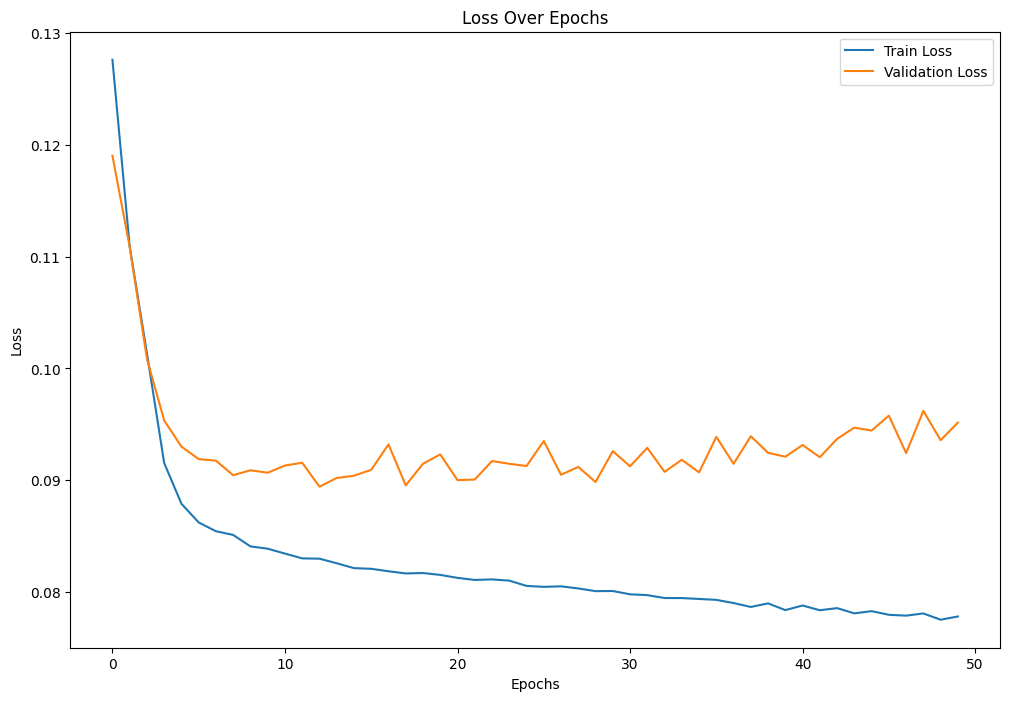

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

# Early Stopping

Epoch 1/100
1923/1923 [==============================] - 5s 2ms/step - loss: 0.1319 - accuracy: 0.9547 - val_loss: 0.1185 - val_accuracy: 0.9578
Epoch 2/100
1923/1923 [==============================] - 7s 3ms/step - loss: 0.1102 - accuracy: 0.9622 - val_loss: 0.1113 - val_accuracy: 0.9605
Epoch 3/100
1923/1923 [==============================] - 4s 2ms/step - loss: 0.1016 - accuracy: 0.9655 - val_loss: 0.1013 - val_accuracy: 0.9628
Epoch 4/100
1923/1923 [==============================] - 4s 2ms/step - loss: 0.0949 - accuracy: 0.9674 - val_loss: 0.1024 - val_accuracy: 0.9643
Epoch 5/100
1923/1923 [==============================] - 6s 3ms/step - loss: 0.0904 - accuracy: 0.9688 - val_loss: 0.0954 - val_accuracy: 0.9658
Epoch 6/100
1923/1923 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9697 - val_loss: 0.0931 - val_accuracy: 0.9660
Epoch 7/100
1923/1923 [==============================] - 4s 2ms/step - loss: 0.0858 - accuracy: 0.9702 - val_loss: 0.0922 - val_ac

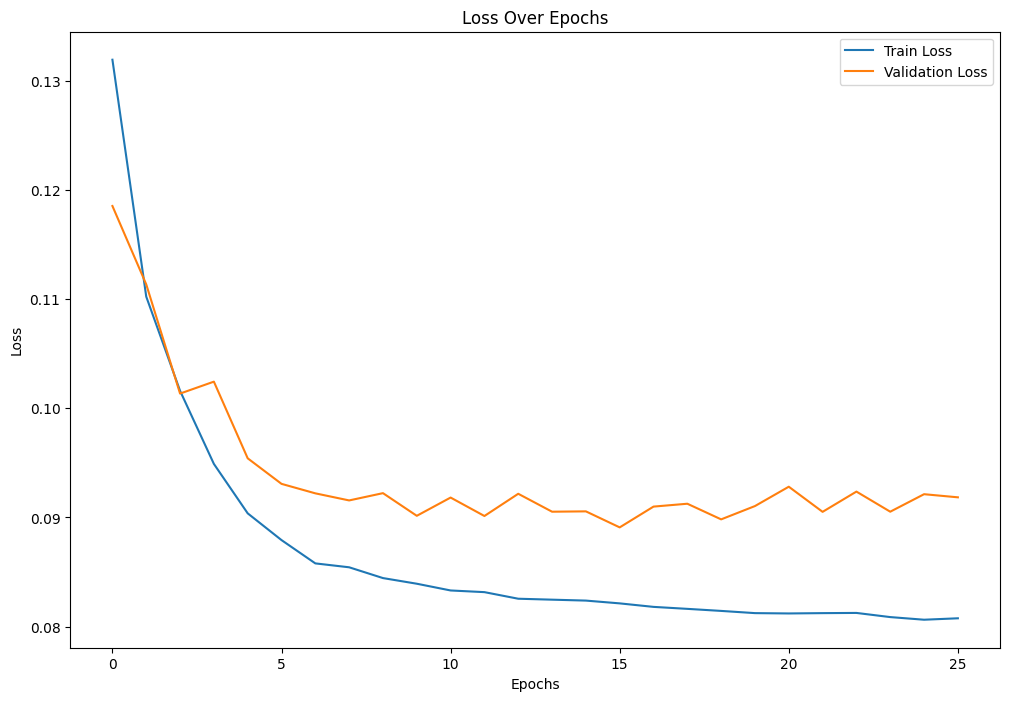

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습 (Early Stopping 포함)
history=""
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

# Loss 변화 그래프 작성
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
# Training the model using LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Accuracy: 0.9596463858554343


In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

linear_kernel = SVC(kernel = 'linear')
linear_kernel.fit(X_train_scaled, y_train)

y_pred_svm = linear_kernel.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.9599063962558503
CPU times: user 1min 14s, sys: 330 ms, total: 1min 15s
Wall time: 1min 35s


In [ ]:
# Training the model using Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred_gnb = gnb.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_gnb)
print("Accuracy:", accuracy)

In [ ]:
# Training the model using KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

def perform_grid_search_knn(X_train, X_test, y_train, y_test):
  # Cross Validation을 이용
  # k에 대해 1~30까지 Grid Search
  param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}
  knn = KNeighborsClassifier()
  grid_search = GridSearchCV(knn, param_grid, cv=10)
  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  best_score = grid_search.best_score_

  best_knn = grid_search.best_estimator_
  y_het = best_knn.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_het)

  # 결과 출력
  print("Best parameters:", best_params)
  print("Best cross-validation score: {:.2f}".format(best_score))
  print("Test set accuracy: {:.2f}".format(test_accuracy))

perform_grid_search_knn(X_train_scaled, X_test_scaled, y_train,y_test)

In [ ]:
# Training the model using ANN(Artificial Neural Network)

import tensorflow as tf
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
deep_history = ann.fit(X_train_scaled, y_train, epochs=100,
                              validation_data = (X_test_scaled, y_test),
                              callbacks=[early_stop])

y_pred_ann = ann.predict(X_test_scaled)
# 예측값을 이진 분류로 변환 (0.5를 기준으로)
y_pred_ann = (y_pred_ann>0.5)

plt.figure(figsize=(12, 8))
plt.plot(deep_history.history['loss'], label='Train Loss')
plt.plot(deep_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
deep_history = ann.fit(X_train_scaled_smote, y_train_smote, epochs=100,
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop])

y_pred_ann_smote = ann.predict(X_test)
y_pred_ann_smote = (y_pred_ann_smote>0.5)


plt.figure(figsize=(12, 8))
plt.plot(deep_history.history['loss'], label='Train Loss')
plt.plot(deep_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame({
    'Before/After SMOTE' : ['Before','Before','Before','Before','Before', 'Before','Before','Before','After','After','After','After','After','After','After','After'],
    'Model Name': ['LR', 'KNN', 'SVM', 'Kernel SVM','Naive Bayes', 'DecisionTree', 'RandomForest', 'ANN', 'LR', 'KNN', 'SVM', 'Kernel SVM','Naive Bayes', 'DecisionTree', 'RandomForest', 'ANN'],
    'True Negative': [confusion_matrix(y_test, y_pred_lr).ravel()[0], confusion_matrix(y_test, y_pred_knn).ravel()[0], confusion_matrix(y_test, y_pred_svm).ravel()[0], confusion_matrix(y_test, y_pred_ksvm).ravel()[0], confusion_matrix(y_test, y_pred_gnb).ravel()[0], confusion_matrix(y_test, y_pred_dtc).ravel()[0], confusion_matrix(y_test, y_pred_rfc).ravel()[0], confusion_matrix(y_test, y_pred_ann).ravel()[0], confusion_matrix(y_test_smote, y_pred_lr_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_knn_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_svm_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_ksvm_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_gnb_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_dtc_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[0]],
    'False Positive': [confusion_matrix(y_test, y_pred_lr).ravel()[1], confusion_matrix(y_test, y_pred_knn).ravel()[1], confusion_matrix(y_test, y_pred_svm).ravel()[1], confusion_matrix(y_test, y_pred_ksvm).ravel()[1], confusion_matrix(y_test, y_pred_gnb).ravel()[1], confusion_matrix(y_test, y_pred_dtc).ravel()[1], confusion_matrix(y_test, y_pred_rfc).ravel()[1], confusion_matrix(y_test, y_pred_ann).ravel()[1], confusion_matrix(y_test_smote, y_pred_lr_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_knn_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_svm_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_ksvm_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_gnb_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_dtc_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[1]],
    'False Negative': [confusion_matrix(y_test, y_pred_lr).ravel()[2], confusion_matrix(y_test, y_pred_knn).ravel()[2], confusion_matrix(y_test, y_pred_svm).ravel()[2], confusion_matrix(y_test, y_pred_ksvm).ravel()[2], confusion_matrix(y_test, y_pred_gnb).ravel()[2], confusion_matrix(y_test, y_pred_dtc).ravel()[2], confusion_matrix(y_test, y_pred_rfc).ravel()[2], confusion_matrix(y_test, y_pred_ann).ravel()[2], confusion_matrix(y_test_smote, y_pred_lr_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_knn_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_svm_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_ksvm_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_gnb_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_dtc_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[2]],
    'True Positive': [confusion_matrix(y_test, y_pred_lr).ravel()[3], confusion_matrix(y_test, y_pred_knn).ravel()[3], confusion_matrix(y_test, y_pred_svm).ravel()[3], confusion_matrix(y_test, y_pred_ksvm).ravel()[3], confusion_matrix(y_test, y_pred_gnb).ravel()[3], confusion_matrix(y_test, y_pred_dtc).ravel()[3], confusion_matrix(y_test, y_pred_rfc).ravel()[3], confusion_matrix(y_test, y_pred_ann).ravel()[3], confusion_matrix(y_test_smote, y_pred_lr_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_knn_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_svm_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_ksvm_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_gnb_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_dtc_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[3]],
    'Accuracy Score': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_ksvm), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_ann), accuracy_score(y_test_smote, y_pred_lr_smote), accuracy_score(y_test_smote, y_pred_knn_smote), accuracy_score(y_test_smote, y_pred_svm_smote), accuracy_score(y_test_smote, y_pred_ksvm_smote), accuracy_score(y_test_smote, y_pred_gnb_smote), accuracy_score(y_test_smote, y_pred_dtc_smote), accuracy_score(y_test_smote, y_pred_rfc_smote), accuracy_score(y_test_smote, y_pred_ann_smote)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_ksvm), f1_score(y_test, y_pred_gnb), f1_score(y_test, y_pred_dtc), f1_score(y_test, y_pred_rfc), f1_score(y_test, y_pred_ann), f1_score(y_test_smote, y_pred_lr_smote), f1_score(y_test_smote, y_pred_knn_smote), f1_score(y_test_smote, y_pred_svm_smote), f1_score(y_test_smote, y_pred_ksvm_smote), f1_score(y_test_smote, y_pred_gnb_smote), f1_score(y_test_smote, y_pred_dtc_smote), f1_score(y_test_smote, y_pred_rfc_smote), f1_score(y_test_smote, y_pred_ann_smote)],
})
df

# K-Fold Validation

In [ ]:
from sklearn.model_selection import KFold

# K-Fold 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
results = []

for train_index, val_index in kfold.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # 데이터 스케일링
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)

    # 신경망 모델 정의
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # 모델 컴파일
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 모델 학습
    history = model.fit(X_train_fold, y_train_fold, epochs=50, validation_data=(X_val_fold, y_val_fold), batch_size=32, callbacks=[early_stopping])

    # 평가
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    results.append(scores[1])
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%')
    fold_no += 1

print(f'Mean accuracy: {np.mean(results)*100}%')


#L1과 L2 규제

In [ ]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

# Drop out

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))